- Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

- Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

- Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [77]:
#!pip install catboost

In [78]:
from catboost import Pool
from catboost.utils import get_roc_curve

In [79]:
from sklearn.metrics import (roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, \
                             classification_report, plot_confusion_matrix, recall_score, \
                             plot_precision_recall_curve, precision_recall_curve, plot_roc_curve)

In [80]:
import warnings
import numpy as np
import pandas as pd
import catboost as cb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

warnings.simplefilter("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Kaggle_course/data_HW2/assignment_2_test.csv'

In [5]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Kaggle_course/data_HW2/assignment_2_train.csv'

In [6]:
df_train = pd.read_csv(train_path)

In [7]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_test = pd.read_csv(test_path)

In [9]:
df_test.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,credit,299.0,87.0,116.0,NaN,aol.com,NaN,2.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,3.0,2.0,6.0,2.0,4.0,4.0,0.0,4.0,3.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,452.000000,2924.000000,2924.000000,0.0,412.0,0.0,412.0,206.0,412.0,412.0,452.0,2512.0,2512.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,debit,330.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,3059.949951,3059.949951,3059.949951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3059.949951,3059.949951,3059.949951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,credit,126.0,87.0,9.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,319.950012,319.950012,319.950012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.950012,319.950012,319.950012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,0,7415111,171.00,W,11556,309.0,150.0,visa,226.0,debit,181.0,87.0,3.0,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,59.000000,59.000000,0.0,59.0,0.0,59.0,59.0,59.0,59.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,0,7415112,107.95,W,10985,555.0,150.0,visa,226.0,debit,231.0,87.0,0.0,NaN,anonymous.com,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,10.0,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
target = 'isFraud'

In [11]:
numerical_features_train = df_train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_train.shape[1]}")

numerical_features_train.columns

count of numeric_features 380


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)

In [12]:
numerical_features_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y_train = numerical_features_train["isFraud"]
x_train = numerical_features_train.drop(["isFraud"], axis=1)

y_valid = df_test["isFraud"]
x_valid = df_test[numerical_features_train.columns].drop(["isFraud"], axis=1)

In [65]:
train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [66]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 50,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

In [67]:
model = cb.CatBoostClassifier(**cb_params)
model.fit((train_pool), eval_set=valid_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6290627	best: 0.6290627 (0)	total: 166ms	remaining: 2m 45s
50:	test: 0.8393262	best: 0.8398211 (48)	total: 9.01s	remaining: 2m 47s
100:	test: 0.8380929	best: 0.8404271 (90)	total: 18.7s	remaining: 2m 46s
150:	test: 0.8410177	best: 0.8415003 (140)	total: 28.7s	remaining: 2m 41s
200:	test: 0.8465313	best: 0.8466112 (199)	total: 39.1s	remaining: 2m 35s
250:	test: 0.8505776	best: 0.8505776 (250)	total: 49s	remaining: 2m 26s
300:	test: 0.8526032	best: 0.8526242 (299)	total: 58.9s	remaining: 2m 16s
350:	test: 0.8536657	best: 0.8537867 (347)	total: 1m 8s	remaining: 2m 7s
400:	test: 0.8546251	best: 0.8547087 (383)	total: 1m 18s	remaining: 1m 56s
450:	test: 0.8547847	best: 0.8549230 (423)	total: 1m 27s	remaining: 1m 46s
500:	test: 0.8556314	best: 0.8556396 (498)	total: 1m 37s	remaining: 1m 37s
550:	test: 0.8555361	best: 0.8556437 (519)	total: 1m 45s	remaining: 1m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8556436616
bestIteration = 519

Shrink model to fi

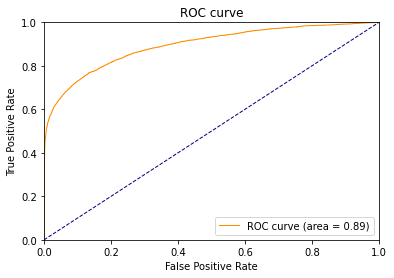

In [68]:
fpr, tpr, thresholds = get_roc_curve(model, train_pool, plot=False)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

__cross validation__

In [16]:
cv_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "n_estimators": 500,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "thread_count": 4,
    "verbose": 20,
    "random_seed": 42
}

cb_cv = cb.cv(
    cb.Pool(x_train, y_train),
    params=cv_params,
    num_boost_round=200,
    stratified=True,
    shuffle=True,
    nfold=3,
    verbose=50,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	test: 0.6298123	best: 0.6298123 (0)	total: 176ms	remaining: 34.9s
50:	test: 0.8511488	best: 0.8513536 (47)	total: 7.79s	remaining: 22.8s
100:	test: 0.8653577	best: 0.8654726 (99)	total: 16s	remaining: 15.7s
150:	test: 0.8739284	best: 0.8739284 (150)	total: 24.5s	remaining: 7.93s
199:	test: 0.8803966	best: 0.8803966 (199)	total: 33.1s	remaining: 0us

bestTest = 0.8803966127
bestIteration = 199

Training on fold [1/3]
0:	test: 0.6206148	best: 0.6206148 (0)	total: 153ms	remaining: 30.4s
50:	test: 0.8462812	best: 0.8464393 (49)	total: 8.08s	remaining: 23.6s
100:	test: 0.8549029	best: 0.8549029 (100)	total: 16.2s	remaining: 15.9s
150:	test: 0.8636858	best: 0.8636858 (150)	total: 24.8s	remaining: 8.06s
199:	test: 0.8697674	best: 0.8697674 (199)	total: 34s	remaining: 0us

bestTest = 0.8697674027
bestIteration = 199

Training on fold [2/3]
0:	test: 0.6362556	best: 0.6362556 (0)	total: 223ms	remaining: 44.3s
50:	test: 0.8481309	best: 0.8487363 (49)	total: 8.22s	remaini

In [17]:
cb_cv = pd.DataFrame(cb_cv)

In [18]:
cb_cv.tail()

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
195,195,0.874372,0.005485,0.084062,0.001629,0.082706,0.000198
196,196,0.874464,0.005367,0.084021,0.001595,0.082662,0.000209
197,197,0.874517,0.005389,0.083973,0.001580,0.082606,0.000220
198,198,0.874797,0.005347,0.083898,0.001583,0.082528,0.000222
199,199,0.874916,0.005322,0.083852,0.001582,0.082475,0.000236


## Categorical features treatment

In [19]:
categorical_features = df_train.select_dtypes(include=[np.object])

In [20]:
categorical_features.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def categorical_transformation(df):

  Product_CD_dict = {
    'W': 1, 
    'H': 2, 
    'C': 3, 
    'S': 4, 
    'R': 5}

  df['ProductCD_ord'] = df.ProductCD.map(Product_CD_dict)

  df['card4'] = df.card4.fillna('unknown')
  Card4_dict = {
    'discover': 1, 
    'mastercard': 2, 
    'visa': 3, 
    'american express': 4, 
    'unknown': 5
}
  df['card4_ord'] = df.card4.map(Card4_dict)

  df['card6'] = df.card6.fillna('unknown')
  Card6_dict = {
    'credit': 1, 
    'debit': 2, 
    'debit or credit': 3, 
    'charge card': 4, 
    'unknown': 5
}
  df['card6_ord'] = df.card6.map(Card6_dict)

  df['P_emaildomain'] = df.P_emaildomain.fillna('unknown')
  df['P_emaildomain_ord'] = LabelEncoder().fit_transform(df.P_emaildomain)

  df['R_emaildomain'] = df.R_emaildomain.fillna('unknown')
  df['R_emaildomain_ord'] = LabelEncoder().fit_transform(df.R_emaildomain)

  M_dict = {
    'F':0,
    'T':1,
    'unknown':-1
}
  M4_dict = {
    'M2':3,
    'M0':4,
    'unknown':6,
    'M1':5
}
  df['M4'] = df.M4.fillna('unknown')
  df['M4_ord'] = df.M4.map(M4_dict)

  M_features = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
  for feature in M_features: 
    df[feature] = df[feature].fillna('unknown')
    df[feature + '_ord'] = df[feature].map(M_dict)
  
  upd_features = categorical_features.columns.to_list()
  upd_features = [i+'_ord' for i in categorical_features.columns.to_list()]

  return df[upd_features]

In [23]:
df_cat_train = categorical_transformation(df_train[categorical_features.columns.to_list()])

In [31]:
df_cat_train.head()

,ProductCD_ord,card4_ord,card6_ord,P_emaildomain_ord,R_emaildomain_ord,M1_ord,M2_ord,M3_ord,M4_ord,M5_ord,M6_ord,M7_ord,M8_ord,M9_ord
0,1,1,1,48,49,1,1,1,3,0,1,-1,-1,-1
1,1,2,1,16,49,-1,-1,-1,4,1,1,-1,-1,-1
2,1,3,2,35,49,1,1,1,4,0,0,0,0,0
3,1,2,2,54,49,-1,-1,-1,4,1,0,-1,-1,-1
4,2,2,1,16,49,-1,-1,-1,6,-1,-1,-1,-1,-1


In [24]:
df_cat_test = categorical_transformation(df_test[categorical_features.columns.to_list()])

In [32]:
df_cat_test.head()

,ProductCD_ord,card4_ord,card6_ord,P_emaildomain_ord,R_emaildomain_ord,M1_ord,M2_ord,M3_ord,M4_ord,M5_ord,M6_ord,M7_ord,M8_ord,M9_ord
0,1,3,1,2,45,1,1,0,4,1,0,0,0,1
1,1,3,2,54,45,-1,-1,-1,6,-1,1,-1,-1,-1
2,1,3,1,16,45,1,1,1,6,-1,1,0,0,1
3,1,3,2,1,45,1,1,1,4,1,1,0,1,1
4,1,3,2,1,45,1,1,1,6,-1,1,1,1,1


In [25]:
#добавим обработанные категориальные признаки к числовым и заново обучим модель.

In [37]:
num_list = numerical_features_train.columns.to_list()

In [38]:
df_cat_train_2 = df_train[num_list].join(df_cat_train)

In [39]:
df_cat_test_2 = df_test[num_list].join(df_cat_test)

In [40]:
y_train_cat = df_train["isFraud"]
x_train_cat = df_cat_train_2.drop(["isFraud"], axis = 1)

y_valid_cat = df_test["isFraud"]
x_valid_cat = df_cat_test_2.drop(["isFraud"], axis = 1)

In [70]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 50,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

In [73]:
model_cat = cb.CatBoostClassifier(**cb_params)
model_cat.fit(train_pool_cat, eval_set=valid_pool_cat)

0:	test: 0.6361880	best: 0.6361880 (0)	total: 189ms	remaining: 3m 8s
50:	test: 0.8402346	best: 0.8402346 (50)	total: 9.09s	remaining: 2m 49s
100:	test: 0.8458374	best: 0.8459581 (95)	total: 18.7s	remaining: 2m 46s
150:	test: 0.8486505	best: 0.8486965 (147)	total: 28.8s	remaining: 2m 42s
200:	test: 0.8540255	best: 0.8540255 (200)	total: 39.6s	remaining: 2m 37s
250:	test: 0.8565373	best: 0.8565373 (250)	total: 49.9s	remaining: 2m 29s
300:	test: 0.8586866	best: 0.8586948 (299)	total: 59.6s	remaining: 2m 18s
350:	test: 0.8594313	best: 0.8594749 (328)	total: 1m 9s	remaining: 2m 7s
400:	test: 0.8602894	best: 0.8603630 (396)	total: 1m 17s	remaining: 1m 56s
450:	test: 0.8607893	best: 0.8608971 (449)	total: 1m 27s	remaining: 1m 46s
500:	test: 0.8610711	best: 0.8610711 (500)	total: 1m 35s	remaining: 1m 35s
550:	test: 0.8613463	best: 0.8613474 (549)	total: 1m 44s	remaining: 1m 24s
600:	test: 0.8613595	best: 0.8613608 (569)	total: 1m 52s	remaining: 1m 14s
Stopped by overfitting detector  (50 itera

__cross validation__

In [45]:
cv_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "n_estimators": 500,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "thread_count": 4,
    "verbose": 20,
    "random_seed": 42
}

cb_cv_cat = cb.cv(
    cb.Pool(x_train_cat, y_train_cat),
    params=cv_params,
    num_boost_round=200,
    stratified=True,
    shuffle=True,
    nfold=3,
    verbose=50,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	test: 0.6575756	best: 0.6575756 (0)	total: 177ms	remaining: 35.3s
50:	test: 0.8567962	best: 0.8567962 (50)	total: 7.95s	remaining: 23.2s
100:	test: 0.8691596	best: 0.8691596 (100)	total: 16.5s	remaining: 16.2s
150:	test: 0.8791714	best: 0.8791714 (150)	total: 25.3s	remaining: 8.21s
199:	test: 0.8854041	best: 0.8854041 (199)	total: 34.3s	remaining: 0us

bestTest = 0.885404109
bestIteration = 199

Training on fold [1/3]
0:	test: 0.6396568	best: 0.6396568 (0)	total: 172ms	remaining: 34.2s
50:	test: 0.8503679	best: 0.8504257 (49)	total: 8.15s	remaining: 23.8s
100:	test: 0.8609349	best: 0.8609349 (100)	total: 16.4s	remaining: 16.1s
150:	test: 0.8701142	best: 0.8701142 (150)	total: 25.4s	remaining: 8.25s
199:	test: 0.8765127	best: 0.8765127 (199)	total: 34.5s	remaining: 0us

bestTest = 0.8765126944
bestIteration = 199

Training on fold [2/3]
0:	test: 0.5919130	best: 0.5919130 (0)	total: 167ms	remaining: 33.3s
50:	test: 0.8512594	best: 0.8516130 (49)	total: 8.4s	rema

__cat features via Catboost__

In [121]:
dtrain_cat = cb.Pool(x_train_cat, y_train_cat, cat_features=df_cat_train.columns.to_list())
dtest_cat = cb.Pool(x_valid_cat, y_valid_cat, cat_features=df_cat_train.columns.to_list())

In [122]:
model_cat2 = cb.CatBoostClassifier(**cb_params)
model_cat2.fit(dtrain_cat, eval_set=dtest_cat)

0:	test: 0.6368777	best: 0.6368777 (0)	total: 1.03s	remaining: 17m 7s
50:	test: 0.8339673	best: 0.8339673 (50)	total: 44.8s	remaining: 13m 54s
100:	test: 0.8430690	best: 0.8444597 (96)	total: 1m 28s	remaining: 13m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8444596507
bestIteration = 96

Shrink model to first 97 iterations.


In [123]:
# Странно, при тех же параметрах сработал early stopping на 100 итерации. 

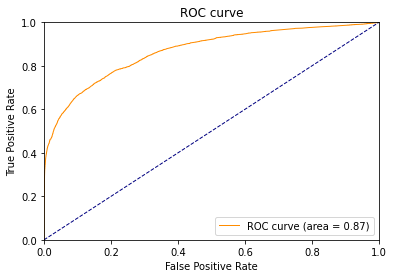

In [124]:
fpr, tpr, thresholds = get_roc_curve(model_cat2, dtrain_cat, plot=False)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [125]:
#Задание 10.
# Выполнено для трех моделей выше. 
# ROC curve #3 (area = 0.87)
# ROC curve #2 (area = 0.90)
# ROC curve #1 (area = 0.89)
# По-видимому я что-то делаю не так, потому что по логике третья кривая ROC-AUC должна быть самой лучшей. Но почему-то наоборот. Узнаем на консультации